<img src="https://i.ibb.co/DWSqtc1/Encabezado.png" alt="descargar" border="0" width=900px>

# **Markenting - Segmentacion de Clientes**
 

<img src="https://i.ibb.co/SVwq8yr/publicidad.png" alt="descargar" border="0" height=200px>

# RETO: "Markenting - Segmentacion de Clientes"

## Comprensión del Negocio

**Contexto**

Conjunto de datos de la empresa iFood, son 2240 registros de la información del cliente respecto a la campaña realizada.

Se busca proveer al equipo de marketing toda la información relevante.
- ¿Como estan relacionadas las tasas de respuesta con las variables?
- ¿ Que otras acciones se pueden desencadenar despues de la exploración de datos?
- Proponer y describir una segmentacion de clientes basados en su comportamiento; ¿Cuantos perfiles hay?




## Importacion de librerias




In [ ]:
import pandas as pd
import seaborn as sns
import datetime as dt
import seaborn as sns
import matplotlib.pyplot as plt

from datetime import datetime

In [ ]:
data = pd.read_csv('https://raw.githubusercontent.com/ifood/ifood-data-advanced-analytics-test/master/ml_project1_data.csv')
data.head(3)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0


In [ ]:
data.shape

(2240, 29)

In [ ]:
# RECENCYY CON RESPECTO A LA CLUSTERIZACION !!

# VARIABLE MENORES DE EDAD = KIDHOME + TEENHOME  ***************
# PARA VER LA CANTIDAD DE MENORES VS RESPONSE

# VARIABLE DE AÑOS EN COMPRA -- 2021 - DT_cUSTOMER -- INT *************************** CLUSTERINGG :3 :V
# HISTOGRAMA DE INCOME

In [ ]:
# DICCIONARIO DE LOS DATOS

Variable |	Descripción de la variable
--- | ---
ID |	Identificador único del cliente
Year_Birth |	Fecha de nacimiento del cliente
Education |	Nivel de educación del cliente
Marital_Status |	Estado Civil del cliente
Income |	Ingreso familiar anual por cliente
Kidhome |	Número de niños en el hogar del cliente
Teenhome |	Número de adolescentes en el hogar del cliente
Dt_Customer |	Fecha de inscripción del cliente en la compañia
Recency |	Número de días desde la última fecha de compra del cliente
MntWines |	Cantidad gastada en vino, en los últimos dos años
MntFruits |	Cantidad gastada en frutas, en los últimos dos años
MntMeatProducts |	Cantidad gastada en carne, en los últimos dos años
MntFishProducts |	Cantidad gastada en pescado, en los últimos dos años
MntSweetProducts |	Cantidad gastada en dulces, en los últimos dos años
MntGoldProds |	Cantidad gastada en oro, en los últimos dos años
NumDealsPurchases |	Número de compras hechas con descuento
NumWebPurchases |	Número de compras hechas a través del sitio web de la compañia
NumCatalogPurchases |	Número de compras hechas mediante un catálogo
NumStorePurchases |	Número de compras hechas directamente en una tienda
NumWebVisitsMonth |	Número de visitas al sitio web de la compañia en el último mes
AcceptedCmp3 |	1 si el cliente acepto la oferta en la tercer campaña, 0 en otro caso
AcceptedCmp4 |	1 si el cliente acepto la oferta en la cuarta campaña, 0 en otro caso
AcceptedCmp5 |	1 si el cliente acepto la oferta en la quinta campaña, 0 en otro caso
AcceptedCmp1 |	1 si el cliente acepto la oferta en la primer campaña, 0 en otro caso
AcceptedCmp2 |	1 si el cliente acepto la oferta en la segunda campaña, 0 en otro caso
Complain |	1 si el cliente se quejó en los últimos dos años, 0 en otro caso
Z_CostContact |	 
Z_Revenue |    
Response |	1 si el cliente acepto la oferta en la última campaña, 0 en otro caso       

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [ ]:
data.head(2)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0


In [ ]:
# REALIZANDO MODIFICACIONES A NUESTROS FEATURES PARA QUE TENGAN SU VERDADERO TIPO DE VARIABLE
data['ID']= data['ID'].astype(str)
data['Year_Birth']= data['Year_Birth'].astype(str)
data['Dt_Customer'] = [datetime.strptime(fecha, '%Y-%m-%d').date() for fecha in data['Dt_Customer']]

In [ ]:
print(type(data['Dt_Customer'][0]))

<class 'datetime.date'>


In [ ]:
data['Dt_Customer'].dtype
# data.info()

dtype('O')

In [ ]:
# Agrupando kidhome y teenhome
data['Grouphome'] = data.Kidhome + data.Teenhome
data.head(3) 

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Grouphome
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1,0
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0,2
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0,0


In [ ]:
# CANTIDAD DE NULOS POR CADA FEATURE
data.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
Grouphome               0
dtype: int64

**INTERPRETACIÓN**

Tenemos 2240 registros, con 29 variables, de las cuales sólo "**Income**" tiene datos nulos (24 Valores)

In [ ]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Income,2216.0,52247.251354,25173.076661,1730.0,35303.00,51381.5,68522.00,666666.0
Kidhome,2240.0,0.444196,0.538398,0.0,0.00,0.0,1.00,2.0
Teenhome,2240.0,0.506250,0.544538,0.0,0.00,0.0,1.00,2.0
Recency,2240.0,49.109375,28.962453,0.0,24.00,49.0,74.00,99.0
MntWines,2240.0,303.935714,336.597393,0.0,23.75,173.5,504.25,1493.0
MntFruits,2240.0,26.302232,39.773434,0.0,1.00,8.0,33.00,199.0
MntMeatProducts,2240.0,166.950000,225.715373,0.0,16.00,67.0,232.00,1725.0
MntFishProducts,2240.0,37.525446,54.628979,0.0,3.00,12.0,50.00,259.0
MntSweetProducts,2240.0,27.062946,41.280498,0.0,1.00,8.0,33.00,263.0
MntGoldProds,2240.0,44.021875,52.167439,0.0,9.00,24.0,56.00,362.0




> ***INTERPRETACION***



**Income**
- 24 Datos faltantes
- El minimo ingreso de los registros es 1 730 y el maximo 666 666; siendo el 25% de los datos menor o igual a 35303

**Recency**
- Se encuentra que el 25% de los registros tienen de 2meses y medio a 3meses aprox sin comprar

**Kidhome | Teenhome**
- Solo el 25% de los registros tienen 1 o mas menores de edad en casa

**MntWines | MntFruits | MntMeatProducts | MntFishProducts | MntSweetProducts | MntGoldProds**
- Se observa que en los dos ultimos años se ha gastado mas en:

  - Vinos ( 25% ha gastado entre 504 y 1493)
  - Carnes ( 25% ha gastado entre 232 y 1725)
  - Oro ( 25% ha gastado entre 56 y 362)

  Y en lo que menos se ha invertido es en: 
  - Frutas (El 75% de los registros gastan menos de 33) siendo el maximo gasto registrado 199

**NumDealsPurchases | NumWebPurchases | NumCatalogPurchases | NumStorePurchases**

- Se observa que hay mas interaccion en los siguiente canales
  - NumCatalogPurchases ( El intervalo de compras del 25% de los registros es de 4 a 28)
  - NumWebPurchases ( El intervalo de compras del 25% de los registros es de 6 a 27)
- Se observa que solo el 25% de los registros aprovechan y compran con descuento ( de a 3 a 15 compras)
- En la tienda se observa que no hay muchas compras el 75% compra a lo mas 8 productos siendo el maximo 13

**NumWebVisitsMonth**
- El 75% de los registros hacen de 0 a 7 visitas en el ultimo mes. Siendo el # maximo de visitas 20

**AcceptedCmp1 | AcceptedCmp2 | AcceptedCmp3 | AcceptedCmp4 | AcceptedCmp5 | Response**
- Solo el 25% de los registros aceptan la oferta en cada campaña

**Complain**
- El 75% de los clientes no levantan ninguna queja en los 2 ultimos años


In [ ]:
data.describe(include = 'object').T

,count,unique,top,freq
ID,2240,2240,10031,1
Year_Birth,2240,59,1976,89
Education,2240,5,Graduation,1127
Marital_Status,2240,8,Married,864
Dt_Customer,2240,663,2012-08-31,12


In [ ]:
data.head(3)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Grouphome
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1,0
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0,2
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0,0


In [ ]:
# Analicemos nuestros variables 

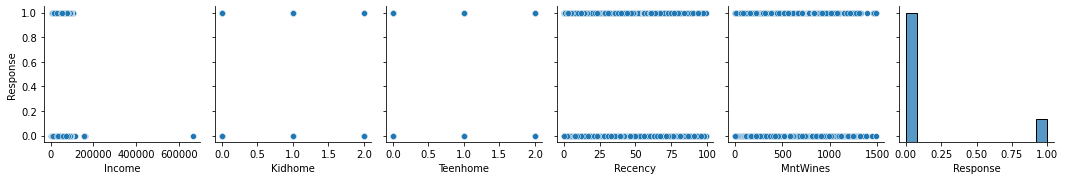

In [ ]:
data_1= data.iloc[:, 0:10]
data_1['Response'] = data['Response']
data_1.head(3)

# sns.pairplot(data_1)
# sns.pairplot(data_1, corner=True)
sns.pairplot(data_1, y_vars=["Response"])

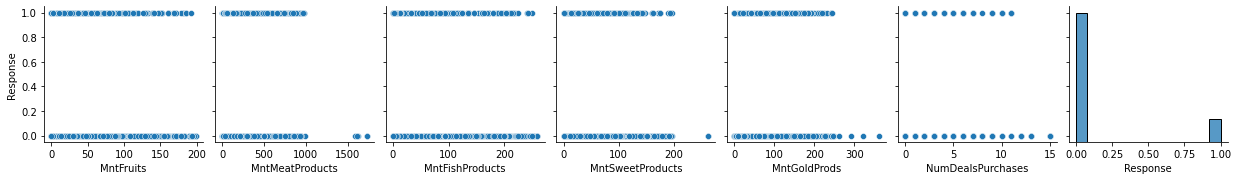

In [ ]:
data_2= data.iloc[:, 10:16]
data_2['Response'] = data['Response']
data_2.head(3)

sns.pairplot(data_2, y_vars=["Response"])

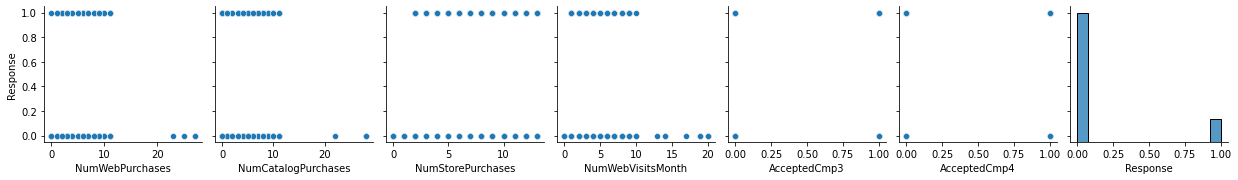

In [ ]:
data_3= data.iloc[:, 16:22]
data_3['Response'] = data['Response']
data_3.head(3)

sns.pairplot(data_3, y_vars=["Response"])

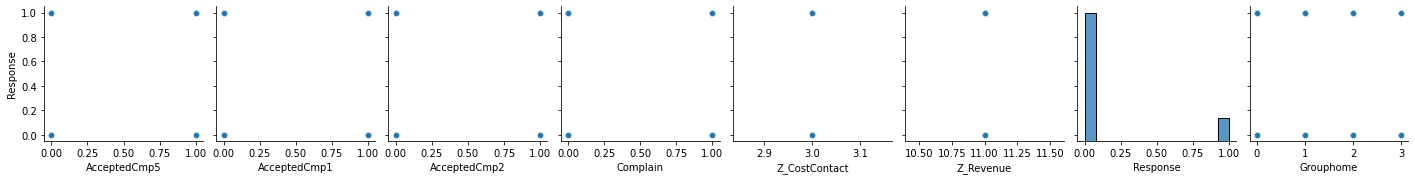

In [ ]:
data_4= data.iloc[:, 22:30]
data_4['Response'] = data['Response']
data_4.head(3)

sns.pairplot(data_4, y_vars=["Response"])

In [ ]:
# REEMPLAZAR VALORES NULOS POR MEDIA
data['Income'].fillna(data['Income'].median(), inplace = True)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   object 
 1   Year_Birth           2240 non-null   object 
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2240 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [ ]:
# Cantidad de categorias por variables categoricas
data.select_dtypes(['object']).nunique()

ID                2240
Year_Birth          59
Education            5
Marital_Status       8
Dt_Customer        663
dtype: int64

In [ ]:
# Definimos las variables que trataremos como numericas y como categoricas de nuesto dataset generado
varCategoricas = ['Education','Marital_Status']

varNumericas = ['Income','Kidhome','Teenhome','Months_on_book',
                'Recency','MntWines',
                'MntFruits','MntMeatProducts','MntFishProducts',
                'MntSweetProducts','MntGoldProds ',
                'NumDealsPurchases','NumWebPurchases',
                'NumCatalogPurchases','NumStorePurchases',
                'NumWebVisitsMonth','AcceptedCmp3',
                'AcceptedCmp4','AcceptedCmp5',
                'AcceptedCmp1','AcceptedCmp2',
                'Complain','Z_CostContact',
                'Z_Revenue','Response']

In [ ]:
# Cuantos clientes aceptaron o una oferta según el número de niños y adolescentes que viven en casa
response_by_grouphome = data.groupby(['Grouphome', 'Response']).Grouphome.count().unstack()
response_by_grouphome

Response,0,1
Grouphome,,
0,469,169
1,1012,116
2,374,47
3,51,2


Text(0, 0.5, 'CANTIDAD')

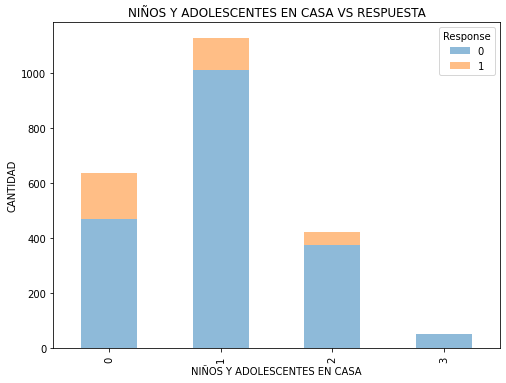

In [ ]:
# graficando
s_plot = response_by_grouphome.plot(kind='bar', 
                                    stacked=True, 
                                    title='NIÑOS Y ADOLESCENTES EN CASA VS RESPUESTA', 
                                    figsize=(8,6),
                                    alpha = 0.5
                                  )
s_plot.set_xlabel('NIÑOS Y ADOLESCENTES EN CASA')
s_plot.set_ylabel('CANTIDAD')

In [ ]:
by_category_education = data.groupby(['Education','Response'])
category_education = by_category_education['Education'].count()
category_education .unstack()

Response,0,1
Education,,
2n Cycle,181,22
Basic,52,2
Graduation,975,152
Master,313,57
PhD,385,101


Text(0, 0.5, 'CANTIDAD')

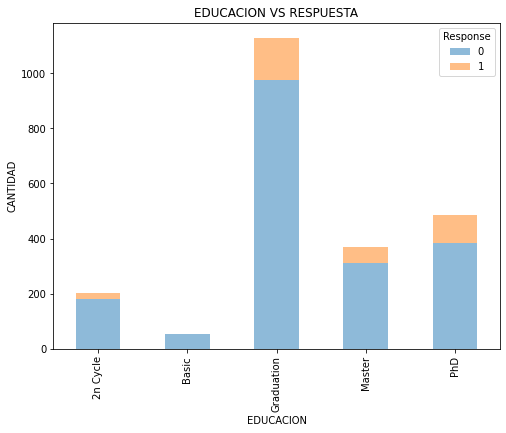

In [ ]:
by_category_education = data.groupby(['Education','Response'])
category_education = by_category_education['Education'].count()
total=category_education.unstack()
s_plot = total.plot(kind='bar',stacked=True,title="EDUCACION VS RESPUESTA",figsize=(8,6),alpha = 0.5)
s_plot.set_xlabel("EDUCACION")
s_plot.set_ylabel("CANTIDAD")

In [ ]:
by_category_education = data.groupby(['Marital_Status','Response'])
category_education = by_category_education['Marital_Status'].count()
category_education .unstack()

# ALONE - SINGLE - YOLO
# MARRIED - TOGETHER
# AGREGAR UNA COLUMNA TASAS ... CASADOS QUE ACEPTARONN / TOTAL CASADOS / TOTAL DE CLIENTES


# AÑOS DE ANTIGUEDAD DEL CLIENTE - AÑO ACTUAL -  DT_CUSTOMER

Response,0,1
Marital_Status,,
Absurd,1,1
Alone,2,1
Divorced,184,48
Married,766,98
Single,374,106
Together,520,60
Widow,58,19
YOLO,1,1


Text(0, 0.5, 'CANTIDAD')

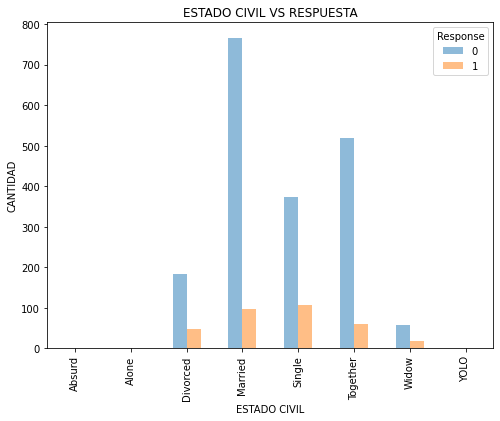

In [ ]:
category_education = data.groupby(['Marital_Status','Response'])['Marital_Status'].count()
total=category_education.unstack()
s_plot = total.plot(kind='bar',title="ESTADO CIVIL VS RESPUESTA",figsize=(8,6),alpha = 0.5)
s_plot.set_xlabel("ESTADO CIVIL")
s_plot.set_ylabel("CANTIDAD")

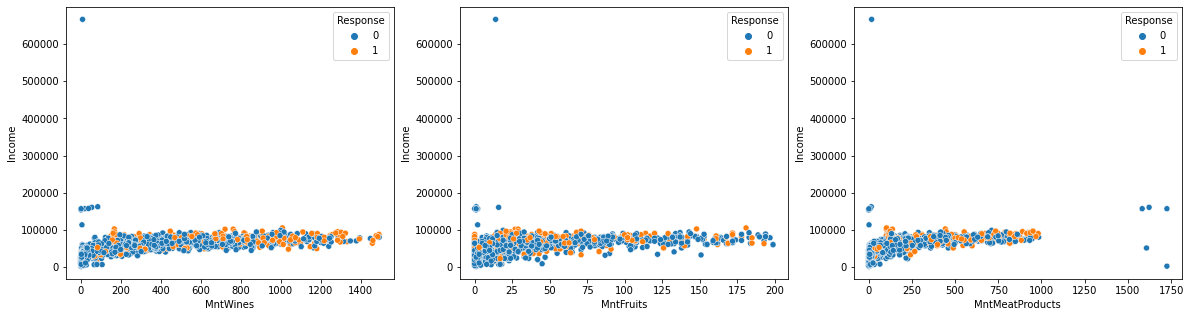

In [ ]:
data_frequency=pd.concat([data['MntWines'],data['MntFruits'],data['MntMeatProducts'],data['MntFishProducts'],data['MntSweetProducts'],data['MntGoldProds'],data['Response'], data['Income']],axis=1)

fig,ax=plt.subplots(ncols=3,figsize=(20,5))
sns.scatterplot(data=data_frequency,y="Income",x="MntWines",hue="Response",ax=ax[0])
sns.scatterplot(data=data_frequency,y="Income",x="MntFruits",hue="Response",ax=ax[1])
sns.scatterplot(data=data_frequency,y="Income",x="MntMeatProducts",hue="Response",ax=ax[2])

In [ ]:
# TOPEO DE LOS VALORES HOLDLAYER
# Vamos a topear la variable Ingresos mayores a 150000
data.loc[data['Income'] >= 150000,'Income'] = 150000

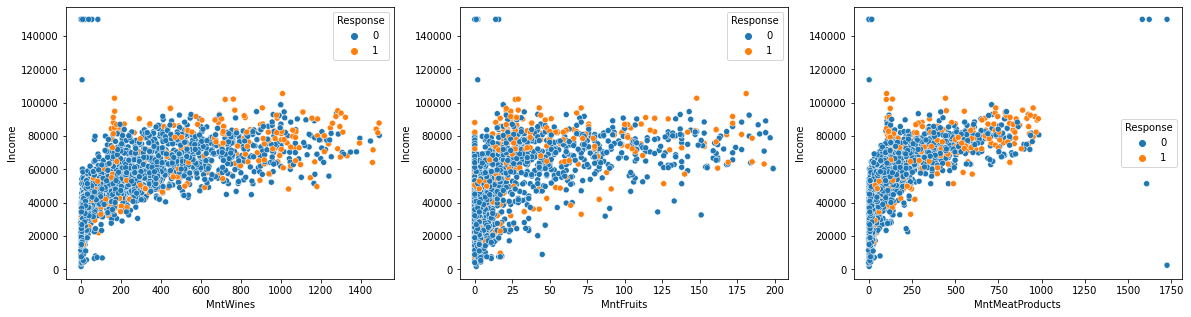

In [ ]:
data_frequency=pd.concat([data['MntWines'],data['MntFruits'],data['MntMeatProducts'],data['MntFishProducts'],data['MntSweetProducts'],data['MntGoldProds'],data['Response'], data['Income']],axis=1)

fig,ax=plt.subplots(ncols=3,figsize=(20,5))
sns.scatterplot(data=data_frequency,y="Income",x="MntWines",hue="Response",ax=ax[0])
sns.scatterplot(data=data_frequency,y="Income",x="MntFruits",hue="Response",ax=ax[1])
sns.scatterplot(data=data_frequency,y="Income",x="MntMeatProducts",hue="Response",ax=ax[2])

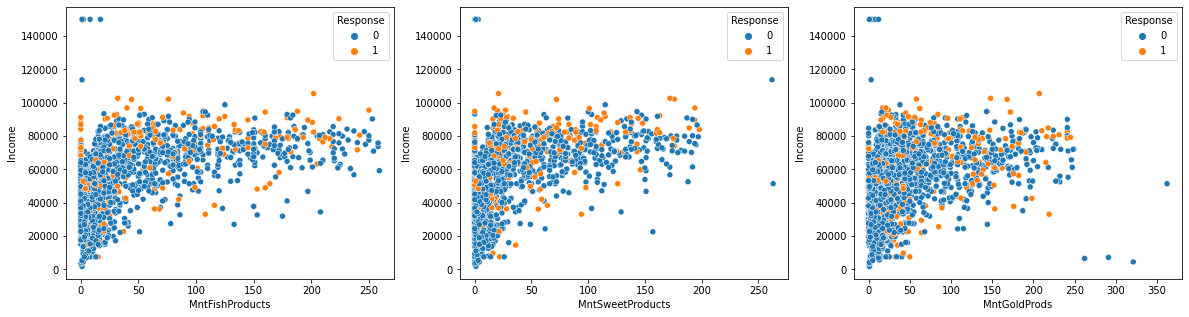

In [ ]:
fig,ax=plt.subplots(ncols=3,figsize=(20,5))
sns.scatterplot(data=data_frequency,y="Income",x="MntFishProducts",hue="Response",ax=ax[0])
sns.scatterplot(data=data_frequency,y="Income",x="MntSweetProducts",hue="Response",ax=ax[1])
sns.scatterplot(data=data_frequency,y="Income",x="MntGoldProds",hue="Response",ax=ax[2])

In [ ]:
data.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response',
       'Grouphome'],
      dtype='object')

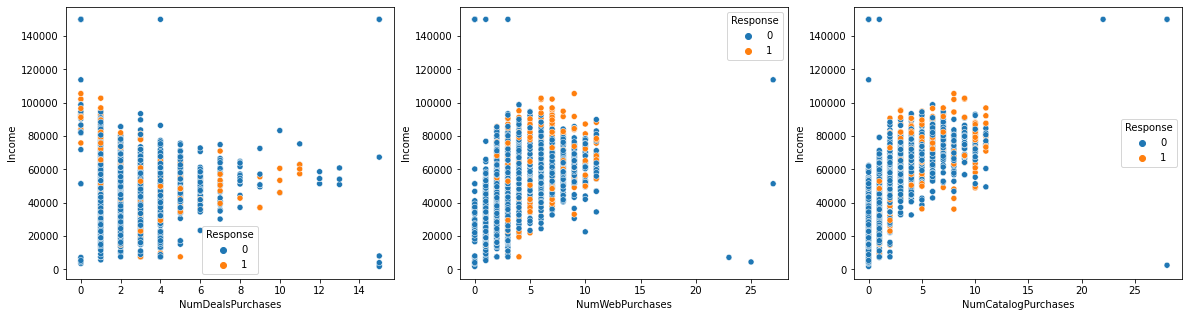

In [ ]:
data_frequency=pd.concat([data['NumDealsPurchases'],data['NumWebPurchases'],data['NumCatalogPurchases'],
                          data['NumStorePurchases'],data['NumWebVisitsMonth'],data['Complain'],
                          data['Response'], data['Income']],axis=1)

fig,ax=plt.subplots(ncols=3,figsize=(20,5))
sns.scatterplot(data=data_frequency,y="Income",x="NumDealsPurchases",hue="Response",ax=ax[0])
sns.scatterplot(data=data_frequency,y="Income",x="NumWebPurchases",hue="Response",ax=ax[1])
sns.scatterplot(data=data_frequency,y="Income",x="NumCatalogPurchases",hue="Response",ax=ax[2])

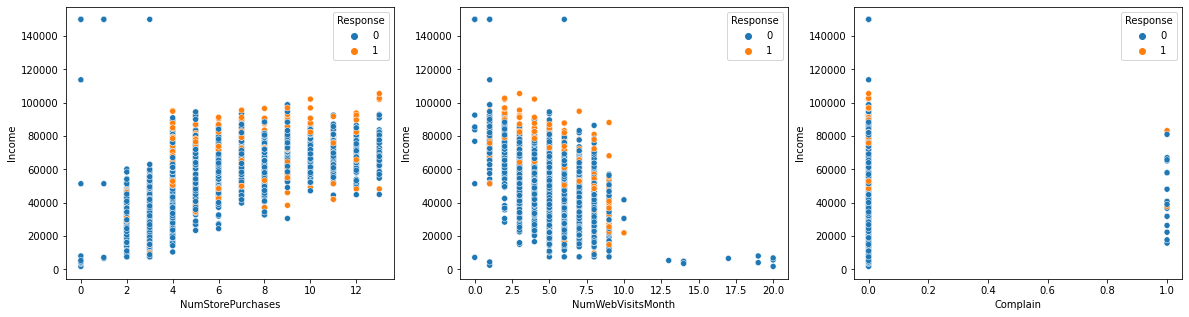

In [ ]:
fig,ax=plt.subplots(ncols=3,figsize=(20,5))
sns.scatterplot(data=data_frequency,y="Income",x="NumStorePurchases",hue="Response",ax=ax[0])
sns.scatterplot(data=data_frequency,y="Income",x="NumWebVisitsMonth",hue="Response",ax=ax[1])
sns.scatterplot(data=data_frequency,y="Income",x="Complain",hue="Response",ax=ax[2])

### INGENIERIA DE VARIABLES



In [ ]:
data["MntGastoTotal"] = (data["MntWines"] + data["MntFruits"] + data["MntMeatProducts"] + data["MntFishProducts"] + data["MntSweetProducts"] +data["MntGoldProds"])/2
data["MntGastoTotal_Income"] = data["MntGastoTotal"] / data["Income"]
data["NumBuyTotal"] = data["NumDealsPurchases"] + data["NumWebPurchases"] + data["NumCatalogPurchases"] + data["NumStorePurchases"]

In [ ]:
# Agregando variables ratios 
data["Ratio_MntWines"] = data["MntWines"]/ data["Income"]*2
data["Ratio_MntFruits"] = data["MntFruits"]/ data["Income"]*2
data["Ratio_MntMeatProducts"] = data["MntMeatProducts"]/ data["Income"]*2
data["Ratio_MntFishProducts"] = data["MntFishProducts"]/ data["Income"]*2
data["Ratio_MntSweetProducts"] = data["MntSweetProducts"]/ data["Income"]*2
data["Ratio_MntGoldProds"] = data["MntGoldProds"]/ data["Income"]*2

data["Ratio_NumDealsPurchases"] = data["NumDealsPurchases"]/ data["NumBuyTotal"]
data["Ratio_NumWebPurchases"] = data["NumWebPurchases"]/ data["NumBuyTotal"]
data["Ratio_NumCatalogPurchases"] = data["NumCatalogPurchases"]/ data["NumBuyTotal"]
data["Ratio_NumStorePurchases"] = data["NumStorePurchases"]/ data["NumBuyTotal"]

print("Listoo !!")

Listoo !!


In [ ]:
data.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response',
       'Grouphome', 'MntGastoTotal', 'MntGastoTotal_Income', 'NumBuyTotal',
       'Ratio_MntWines', 'Ratio_MntFruits', 'Ratio_MntMeatProducts',
       'Ratio_MntFishProducts', 'Ratio_MntSweetProducts', 'Ratio_MntGoldProds',
       'Ratio_NumDealsPurchases', 'Ratio_NumWebPurchases',
       'Ratio_NumCatalogPurchases', 'Ratio_NumStorePurchases'],
      dtype='object')

### SEGMENTACIÓN

In [ ]:
predictoras = ['Ratio_MntWines','Ratio_MntFruits','Ratio_MntMeatProducts',
                'Ratio_MntFishProducts','Ratio_MntSweetProducts','Ratio_MntGoldProds',
                'NumDealsPurchases','NumWebPurchases','NumCatalogPurchases','NumStorePurchases',
                'MntGastoTotal_Income', 'NumBuyTotal',
                'Recency','Complain','Response']

# 'MntGastoTotal_Income'
# Income

In [ ]:
# Obtenemos del dataframe el conjunto de datos
X = data[predictoras]

In [ ]:
#Obtenemos la funcion para escalar por la media y la desviacion estandar
from sklearn.preprocessing import StandardScaler
#Creamos el objeto scaler
scaler = StandardScaler()

In [ ]:
#Visualizamos la data antes de Escalar
print("Data antes de Estandarizar...")
display(X.head(5))
X_Scaled_Media = pd.DataFrame(data = scaler.fit_transform(X), columns=X.columns)
print("\nData despues de Estandarizar...")
display(X_Scaled_Media.head(5))

Data antes de Estandarizar...


,Ratio_MntWines,Ratio_MntFruits,Ratio_MntMeatProducts,Ratio_MntFishProducts,Ratio_MntSweetProducts,Ratio_MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,MntGastoTotal_Income,NumBuyTotal,Recency,Complain,Response
0,0.021845,0.003027,0.018783,0.005917,0.003027,0.003027,3,8,10,4,0.013907,25,58,0,1
1,0.000475,0.000043,0.000259,0.000086,0.000043,0.000259,2,1,1,2,0.000291,6,38,0,0
2,0.011897,0.001368,0.003547,0.003100,0.000586,0.001173,1,8,2,10,0.005418,21,26,0,0
3,0.000826,0.000300,0.001501,0.000751,0.000225,0.000375,2,2,0,4,0.000995,8,26,0,0
4,0.005936,0.001475,0.004049,0.001578,0.000926,0.000515,5,5,3,6,0.003620,19,94,0,0



Data despues de Estandarizar...


,Ratio_MntWines,Ratio_MntFruits,Ratio_MntMeatProducts,Ratio_MntFishProducts,Ratio_MntSweetProducts,Ratio_MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,MntGastoTotal_Income,NumBuyTotal,Recency,Complain,Response
0,1.327009,1.842976,0.435427,2.949860,1.781025,0.302644,0.349414,1.409304,2.510890,-0.550785,1.068602,1.320826,0.307039,-0.097282,2.388846
1,-0.962296,-0.698459,-0.178020,-0.718344,-0.695579,-0.354248,-0.168236,-1.110409,-0.568720,-1.166125,-0.556573,-1.154596,-0.383664,-0.097282,-0.418612
2,0.261378,0.430244,-0.069137,1.177640,-0.244655,-0.137359,-0.685887,1.409304,-0.226541,1.295237,0.055372,0.799685,-0.798086,-0.097282,-0.418612
3,-0.924702,-0.479519,-0.136882,-0.300434,-0.544516,-0.326638,-0.168236,-0.750450,-0.910898,-0.550785,-0.472634,-0.894025,-0.798086,-0.097282,-0.418612
4,-0.377291,0.521234,-0.052523,0.220262,0.037412,-0.293572,1.384715,0.329427,0.115638,0.064556,-0.159288,0.539114,1.550305,-0.097282,-0.418612


In [ ]:
# Importamos el Modelo de K Means
from sklearn.cluster import KMeans
# Importamos el modulo de metricas
from sklearn import metrics
# Creamos el modelo de K Means
kmeans = KMeans(n_clusters = 4, random_state=123) # VALOR SEMILLA 

In [ ]:
# Entrenamiento del modelo
kmeans.fit(X_Scaled_Media)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=123, tol=0.0001, verbose=0)

In [ ]:
clus_cent=kmeans.cluster_centers_
clus_cent
# Son los centroides del grupo

array([[ 7.62815012e-01, -2.71364599e-01, -7.86152435e-03,
        -2.94491664e-01, -2.83175074e-01,  4.70847354e-02,
         6.95335797e-01,  7.06526755e-01,  2.16662367e-01,
         5.36316960e-01,  1.77665154e-01,  7.40332409e-01,
         4.44537556e-03, -1.49268164e-02,  4.48413502e-02],
       [-7.97125835e-01, -4.61769607e-01, -1.41995086e-01,
        -4.79477222e-01, -4.62426375e-01, -1.89532768e-01,
        -2.27048715e-01, -7.43046666e-01, -7.19868171e-01,
        -7.92461172e-01, -4.29380695e-01, -9.35752251e-01,
         6.87754336e-03,  2.46777192e-02, -1.93135523e-01],
       [ 5.68397299e-01,  1.09262857e+00,  1.75894326e-01,
         1.14852795e+00,  1.10644677e+00,  2.79032859e-01,
        -3.61915019e-01,  5.35729862e-01,  1.00309184e+00,
         8.04429655e-01,  4.84465051e-01,  8.25387190e-01,
        -1.62874743e-02, -2.66917948e-02,  2.88027093e-01],
       [-9.25592309e-01, -3.91345654e-02,  4.65038796e+01,
        -2.58443116e-01, -5.30731308e-02, -2.21748406

In [ ]:
pd.DataFrame(clus_cent, columns=X.columns)

# Interpretacion

# En el custer 0 (572 registros)
# Son los que tiene mejor ratio en cantidad gastada en Oro y en Vino (Marketing por ese lado)
# 2DO En Hacen mas compras con descuentos

# En el cluster 1 (654 registros) **
# Son aquellas personas que tienen mejora ratio de compras en  frutas, pescados, dulces. Son los 2dos mejores consumidores de Vino etc.
# A las personas que pertenecen a este grupo se deberia de enviar enviar nuestro productos semanalmente ya que son los mejores consumidores 
# Aceptan ofertas - campañas

# En el cluster 2 (1013 registros)
# Son personas que no consumen tanto
# Son los que menos aceptan ofertas - campañas

# En el custer 3 (1 registro)
# Son los mejores compradores en Carnes

# LOS QUE COMPRAN ORO TAMBIEN COMPRAN VINO ??

,Ratio_MntWines,Ratio_MntFruits,Ratio_MntMeatProducts,Ratio_MntFishProducts,Ratio_MntSweetProducts,Ratio_MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,MntGastoTotal_Income,NumBuyTotal,Recency,Complain,Response
0,0.762815,-0.271365,-0.007862,-0.294492,-0.283175,0.047085,0.695336,0.706527,0.216662,0.536317,0.177665,0.740332,0.004445,-0.014927,0.044841
1,-0.797126,-0.461770,-0.141995,-0.479477,-0.462426,-0.189533,-0.227049,-0.743047,-0.719868,-0.792461,-0.429381,-0.935752,0.006878,0.024678,-0.193136
2,0.568397,1.092629,0.175894,1.148528,1.106447,0.279033,-0.361915,0.535730,1.003092,0.804430,0.484465,0.825387,-0.016287,-0.026692,0.288027
3,-0.925592,-0.039135,46.503880,-0.258443,-0.053073,-0.221748,6.561217,-1.470368,8.670110,-1.781466,41.603192,3.665963,-0.245523,-0.097282,-0.418612


In [ ]:
# data[data['Cluster']==0]

In [ ]:
# data.head(20)

In [ ]:
kmeans.labels_

array([2, 1, 2, ..., 0, 0, 1], dtype=int32)

In [ ]:
#Creando la columna Cluster
data['Cluster'] = kmeans.labels_
# data.head(20)

In [ ]:
Num_Cluster = data.groupby(['Cluster']).count()
Num_Cluster['ID']

Cluster
0     630
1    1021
2     588
3       1
Name: ID, dtype: int64

In [ ]:
Num_Cluster = data.groupby(['Cluster','Response']).count()
Num_Cluster['ID']

Cluster  Response
0        0           526
         1           104
1        0           939
         1            82
2        0           440
         1           148
3        0             1
Name: ID, dtype: int64

In [ ]:
# Obtenemos los indicadores de clustering:
print('Inercia: '+str(kmeans.inertia_))
print('Silueta: '+str(metrics.silhouette_score(X,kmeans.labels_))) # Por default es euclidiana

# La inercia mide la distancia que tienes del dato con respecto al centro
# Inercia es el error cuadratico

# SIN ESTANDARIZAR
#Inercia: 8 012 940 079.977863
#Silueta: 0.5318874216644476

Inercia: 19310.619798947107
Silueta: 0.056504334195226456


findfont: Font family ['Times New Roman'] not found. Falling back to DejaVu Sans.


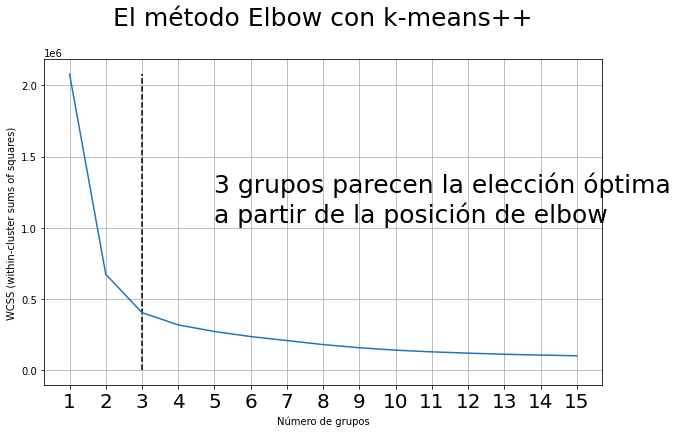

In [ ]:
wcss = []
for i in range(1, 16):
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(10,6))
plt.plot(range(1, 16), wcss)
plt.grid(True)
plt.title('El método Elbow con k-means++\n',fontsize=25)
plt.xlabel('Número de grupos')
plt.xticks(range(1, 16), fontsize=20)
plt.ylabel('WCSS (within-cluster sums of squares)')
plt.vlines(x=3, ymin=0, ymax = max(wcss), linestyles='--')
plt.text(x=5, y=max(wcss) / 2, s='3 grupos parecen la elección óptima\na partir de la posición de elbow ',
          fontsize=25,fontdict={'family':'Times New Roman'})
plt.show()